In [1]:
import numpy as np, pandas as pd
from matplotlib import pyplot as plt
import sympy as sp

### Data initialization

In [2]:
x = np.arange(1,7).reshape(3,2)

### Actual outcome function

In [3]:
def calc_y(x):
    # y_act = np.dot(x, np.array([[5,3]]).T) + 5
    y_act = np.dot(x, np.array([[5,3]]).T)
    return y_act

In [4]:
y = calc_y(x)

### weights initialization

In [5]:
w = np.random.rand(1, x.shape[-1]+1)
w

array([[0.52101108, 0.8032009 , 0.87420602]])

### pad x with 1 for bias

In [6]:
x_pad_wt_bias = np.pad(x, pad_width=((0,0),(1,0)), mode='constant', constant_values=1)

### predictive function

In [7]:
def pred(x, w):
    y_hat = np.dot(x,w.T)
    return y_hat

### cost/loss function (MSE)

In [8]:
def loss(y, y_hat):
    error = (y - y_hat) ** 2
    # print("error", type(error))
    return np.mean(error)

### learning rate

In [9]:
lr = 0.0001

### back propagation

In [ ]:
sympy_vars = np.array(sp.symbols('x0, x1, x2, y'))
sp_yhat = np.dot(w.flatten().T, sympy_vars[:-1])
sp_z = (sympy_vars[-1] - (sp_yhat)) ** 2
part_der = []
for idx, vrb in enumerate(sympy_vars[:-1]):
    part_der.append(sp.lambdify((sympy_vars), sp.diff(sp_z, sympy_vars[idx]), 'sympy'))

part_der = np.array(part_der)

### weight updation

In [12]:
df = pd.DataFrame(x_pad_wt_bias, columns='x0, x1, x2'.split(", "))
df['y'] = y.flatten()

### loop until loss is near zero

In [13]:
epoch = 2000
y_hat_lst = []
loss_lst = []
weight_lst = []

for i in range(epoch):
    y_hat = pred(x_pad_wt_bias, w)
    y_hat_lst.append(y_hat)
    loss_calc = loss(y, y_hat)
    print(loss_calc)
    loss_lst.append(loss_calc)

    avg_error_prtl_drv_lst = []
    for drv in part_der:
        avg_error_prtl_drv = df.apply(lambda x_var: drv(*x_var), axis=1).mean()
        avg_error_prtl_drv_lst.append(avg_error_prtl_drv)

    w = w.flatten() - lr * np.array(avg_error_prtl_drv_lst)
    weight_lst.append(w)
    # break

529.8308019824414
600.3746195543683
599.3507280326576
598.32848931475
597.3079034006456
596.2889702903444
595.2716899838465
594.2560624811516
593.2420877822598
592.2297658871712
591.219096795886
590.2100805084036
589.2027170247244
588.1970063448485
587.1929484687759
586.1905433965062
585.1897911280398
584.1906916633766
583.1932450025164
582.1974511454595
581.2033100922056
580.210821842755
579.2199863971075
578.2308037552632
577.243273917222
576.257396882984
575.2731726525492
574.2906012259173
573.309682603089
572.3304167840635
571.3528037688412
570.3768435574221
569.4025361498063
568.4298815459937
567.4588797459842
566.4895307497777
565.5218345573744
564.5557911687742
563.5914005839772
562.6286628029835
561.6675778257929
560.7081456524055
559.7503662828212
558.7942397170401
557.8397659550621
556.8869449968873
555.9357768425157
554.9862614919471
554.0383989451818
553.0921892022195
552.1476322630606
551.2047281277047
550.263476796152
549.3238782684025
548.3859325444561
547.4496396243128


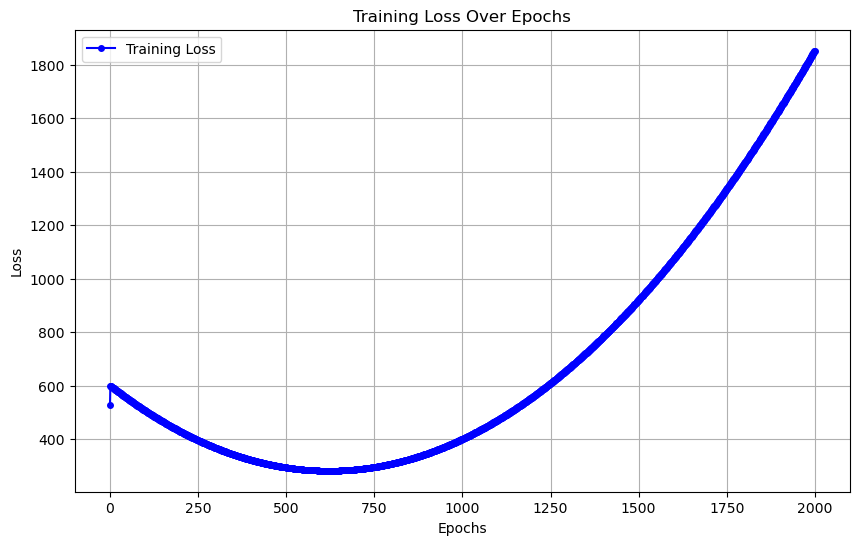

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the loss
plt.figure(figsize=(10, 6))
plt.plot(range(epoch), loss_lst, label='Training Loss', color='b', marker='o', linestyle='-', markersize=4)

# Adding titles and labels
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()


Epoch 0: Loss = 609.8179149915185
Epoch 100: Loss = 0.6973776266095237


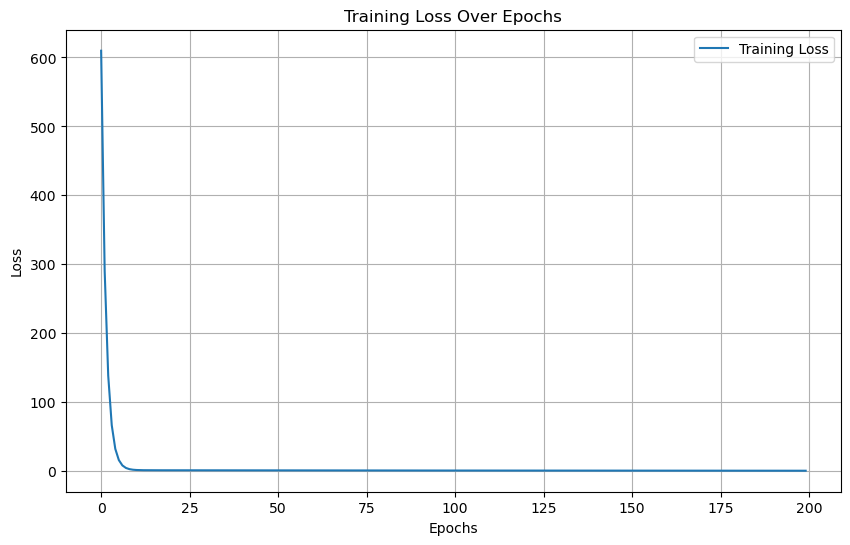

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Data initialization
x = np.arange(1, 7).reshape(3, 2)

# Actual outcome function
def calc_y(x):
    return np.dot(x, np.array([[5, 3]]).T)

y = calc_y(x)

# Weights initialization
w = np.random.rand(1, x.shape[-1] + 1)

# Pad x with 1 for bias
x_pad_wt_bias = np.pad(x, pad_width=((0, 0), (1, 0)), mode='constant', constant_values=1)

# Predictive function
def pred(x, w):
    return np.dot(x, w.T)

# Cost/loss function (MSE)
def loss(y, y_hat):
    return np.mean((y - y_hat) ** 2)

# Learning rate
lr = 0.01

# Gradient calculation and weight update
def compute_gradients(x, y, y_hat):
    error = y_hat - y
    grad = np.dot(error.T, x) / x.shape[0]
    return grad

# Loop until loss is near zero
epoch = 200
y_hat_lst = []
loss_lst = []
weight_lst = []

for i in range(epoch):
    y_hat = pred(x_pad_wt_bias, w)
    y_hat_lst.append(y_hat)
    loss_calc = loss(y, y_hat)
    loss_lst.append(loss_calc)

    gradients = compute_gradients(x_pad_wt_bias, y, y_hat)
    w = w - lr * gradients
    weight_lst.append(w)

    if i % 100 == 0:
        print(f'Epoch {i}: Loss = {loss_calc}')

# Plot loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(loss_lst, label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
w

array([[-0.18329107,  4.80053821,  3.19603951]])